In [1]:
from health_death_lib import Eda
from health_death_lib import Prep
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
xcl = pd.ExcelFile('2019_County_Health_Rankings_Data_v2.xls')

In [3]:
#Get dataframes from excel by sheetnames
ranked_measure = Eda.get_df('Ranked Measure Data',xcl)
addit_measure = Eda.get_df('Additional Measure Data',xcl)

#Get dataframe by neccessary columns
rank_df = Eda.get_ranked_df(ranked_measure)
add_df = Eda.get_add_df(addit_measure)

#Merge and drop the null values
df_merged = Eda.merge_dropna(add_df,rank_df)

#Get numerical columns
num_df = Eda.get_num_df(df_merged)

## Preprocessing

In [4]:
train_set, test_set = train_test_split(num_df, test_size=0.4, random_state=42)

In [5]:
#Remove the outliers
train_set = Prep.remove_outliers(train_set)

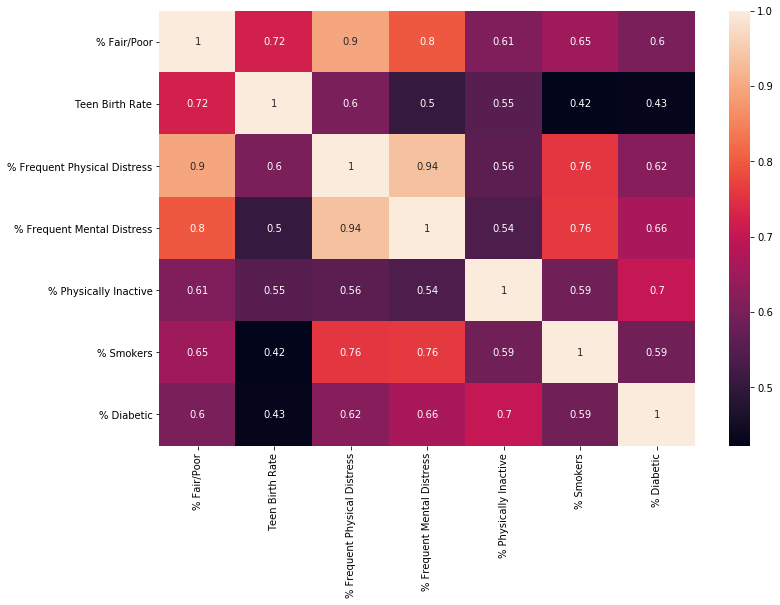

In [6]:
df_seven = Eda.get_df_seven(train_set)

There is a high chance of multicollinearity between two independent variables % Smokers, %Frequent Mental Distress and % Frequent Physical Distress and % Fair/Poor as we see from the heatmap above they are highly related to each other.

% Fair/Poor is not normal 1.0095420198039525e-06
Teen Birth Rate is not normal 1.6060495006507218e-06
% Frequent Physical Distress is not normal 4.355152187394365e-06
% Frequent Mental Distress is not normal 0.000319633916276282
% Physically Inactive is not normal 0.047234654594848074
% Smokers is not normal 6.41827906150393e-08
% Diabetic is not normal 0.026950490126929506


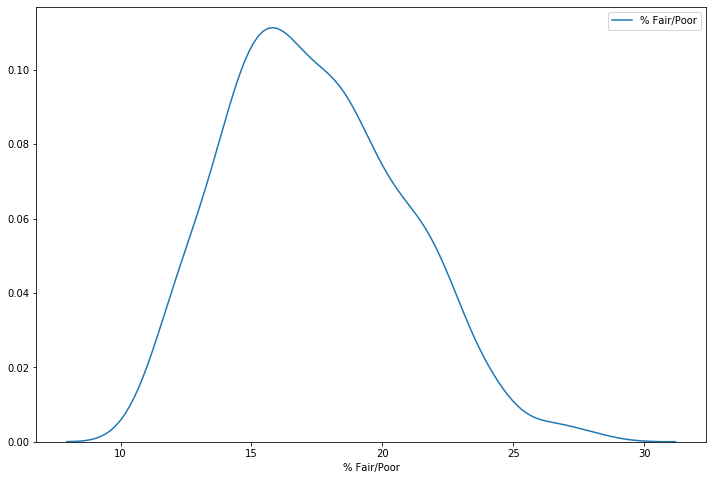

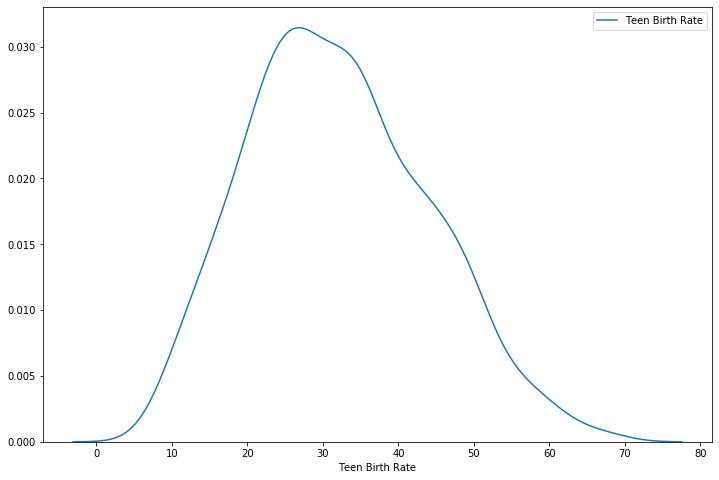

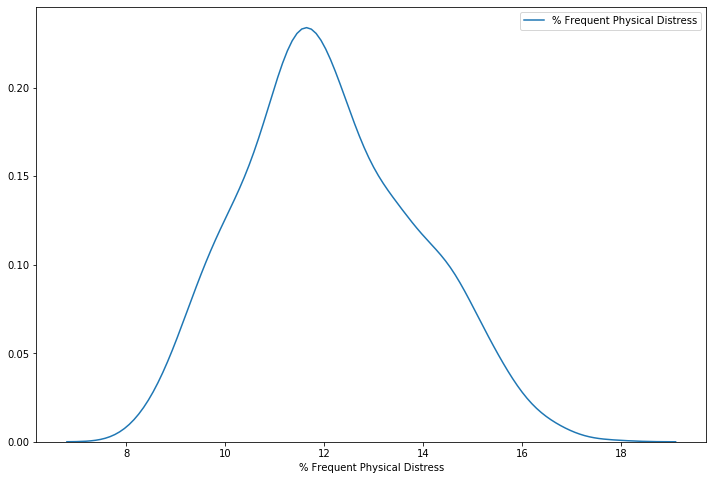

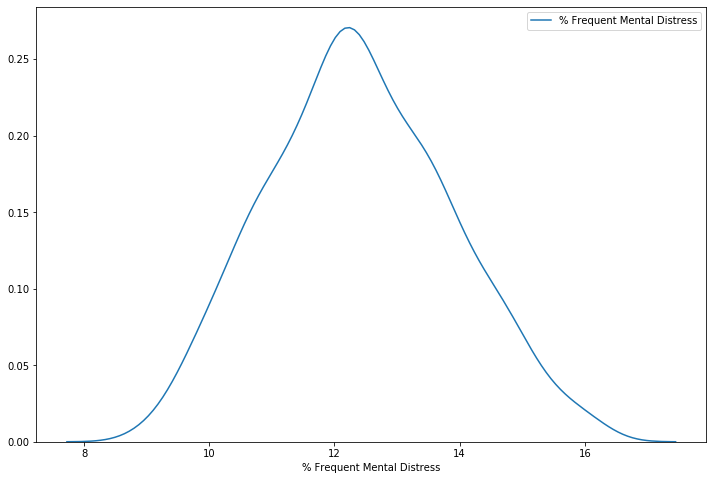

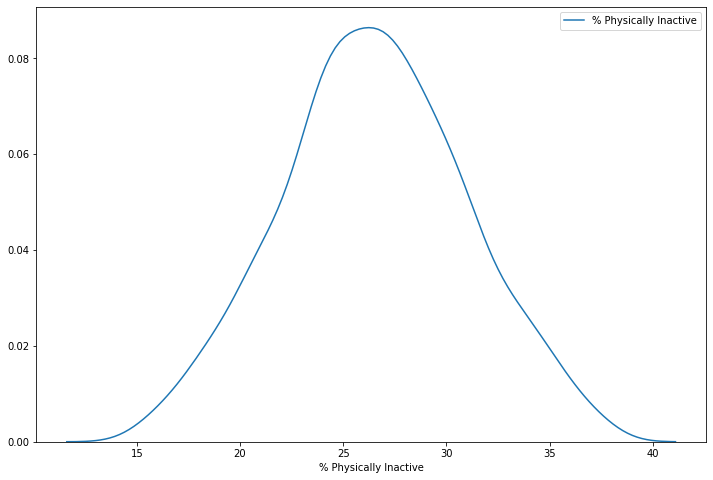

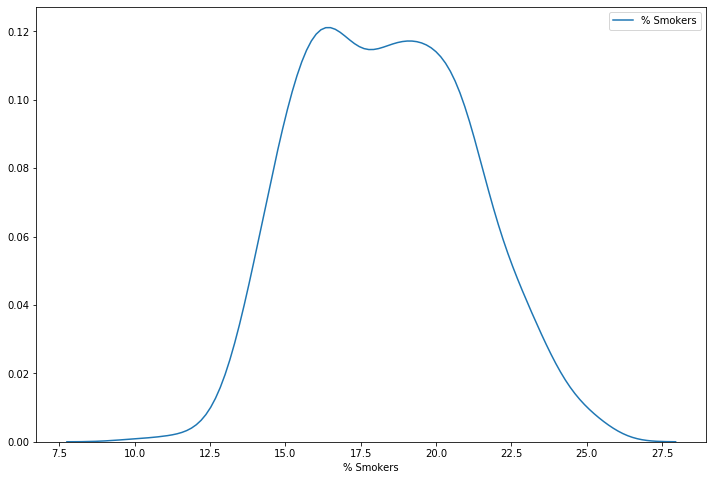

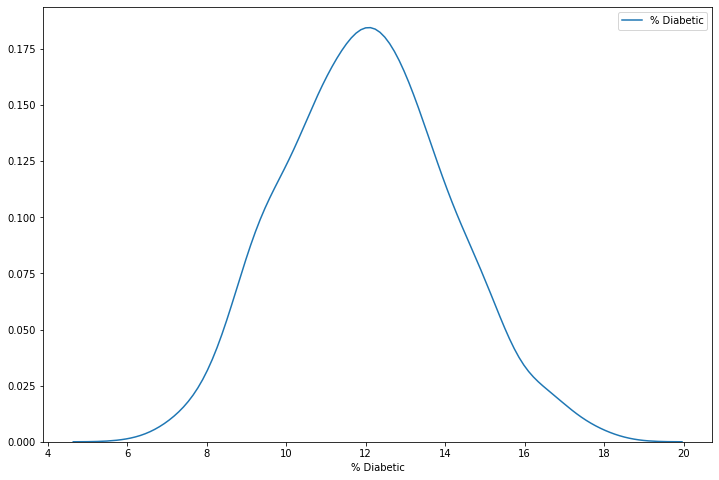

In [7]:
Prep.normality_check(df_seven)

Data doesn't look normal but for Linear Regression we don't need to normalize it since we will use Standard Scale.

In [8]:
target = train_set['Life Expectancy']
predictors1 = train_set[['% Smokers', 'Teen Birth Rate', '% Diabetic','% Physically Inactive', '% Fair/Poor' ]]

In [9]:
df_seven_scaled = Prep.scale(predictors1)

We will run different regression models to see which one performs best for our task and choose a baseline model among them

## Model Selection